`Hasnain Zaman`


# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## Questions
1. Which category has the highest number of reviews?
2. Which category has the highest number of installs?
3. Which category has the highest number of apps?
4. Which category has the highest rating?
5. How many apps are there in the dataset?
6. What are the unique categories of apps available?
7. What is the average rating of apps?
8. What is the most reviewed app in the dataset?
9. What is the average size of an app in MB?
10. How many apps are free and how many are paid?
11. What are the unique content ratings?
12. What are the top 5 genres by number of apps?
13. What is the most recent update date?
14. What is the distribution of apps across different Android versions?
15. What is the average number of installs by category?
16. What is the average price of paid apps?
17. What is the most common current version?
18. What is the distribution of app sizes across different content ratings?
19. What is the ratio of free to paid apps by category?
20. What is the average rating of apps in each content rating category?

## Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data 
df = pd.read_csv("googleplaystore.csv")

## Preprosessing

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [20]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size_in_bytes     1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_Mb        1695
dtype: int64

In [6]:
df.shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 10841 rows and 13 columns.


In [45]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


> There are some columns which are of object data type but they should be of numeric data type, we will convert them.
   - `'Size', 'Installs', 'Price'`

### `Size`

In [8]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [9]:
# find the values in size column which has 'M' in it
m=df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()
# find the values in size column which has 'k' in it
k=df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()
# find the values in size column which has 'Varies with device' in it
vwd=df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

In [11]:
print(f"We have {m} values in size column which has 'M' in it")
print(f"We have {k} values in size column which has 'k' in it")
print(f"We have {vwd} values in size column which has 'Varies with device' in it")

We have 8830 values in size column which has 'M' in it
We have 316 values in size column which has 'k' in it
We have 1695 values in size column which has 'Varies with device' in it


- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [12]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [13]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [14]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.


### `Installs`

In [15]:
# check the unique values in install column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.
- - The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [17]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_in_bytes   9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_in_Mb      9146 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [21]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [22]:
df['Installs_category'].value_counts()

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

### `price`

In [23]:
# count the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [24]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [25]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [26]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


## Descriptive Statistics

In [27]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [28]:
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

<Axes: >

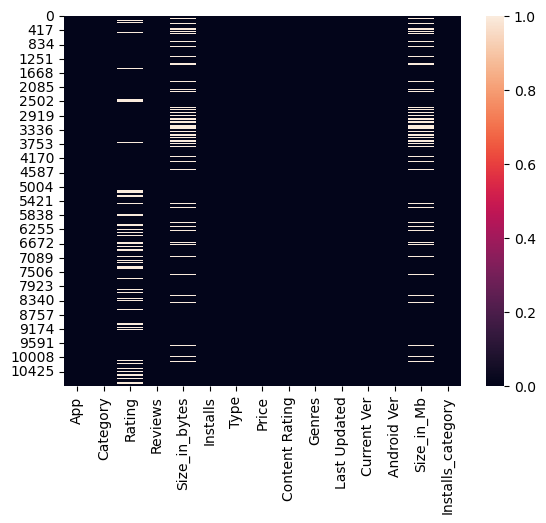

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Mb           0
Installs_category    0
dtype: int64

In [65]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_google_playstore.csv', index=False)

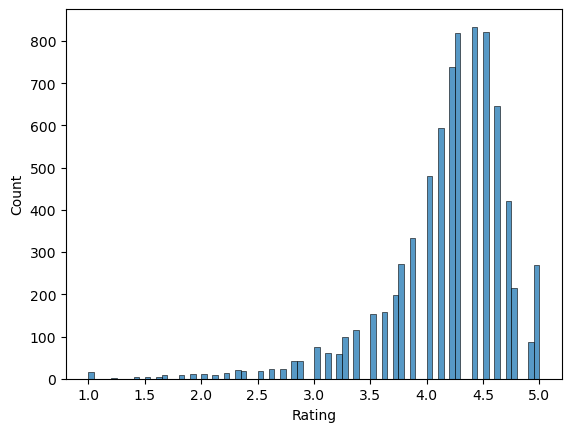

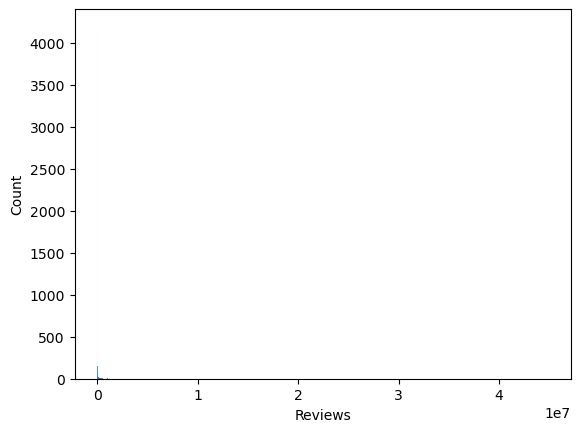

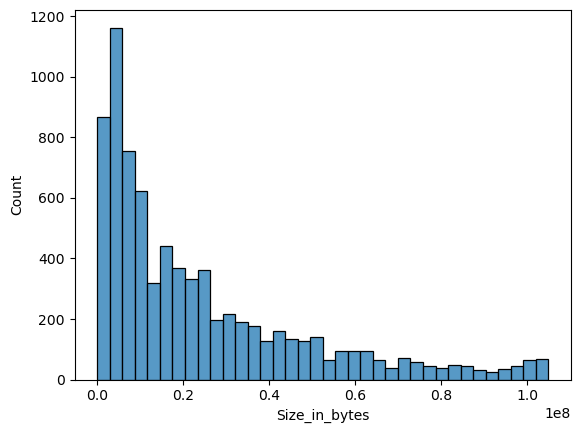

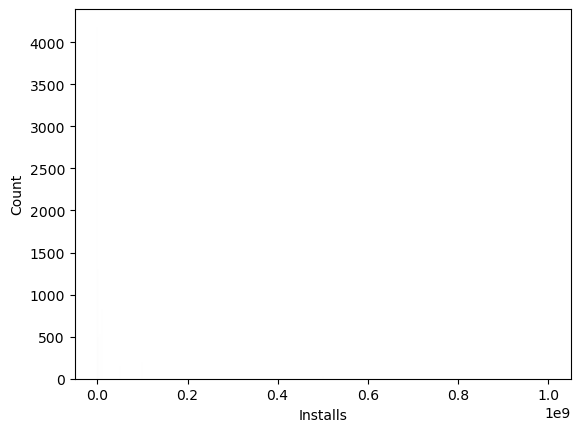

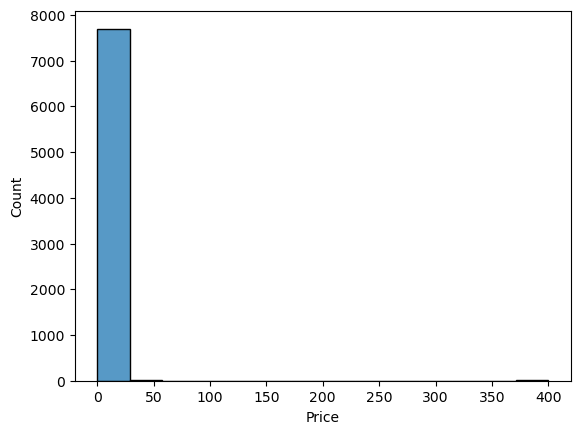

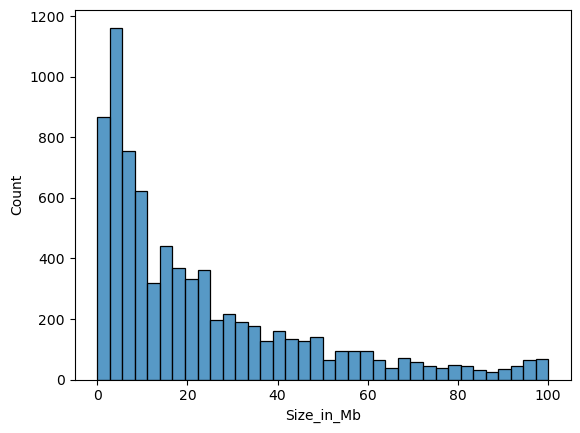

In [32]:
# check the distribution of the numeric column

for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        sns.histplot(df[i])
        plt.show()

# **_Observations_**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them .
   - `'Size', 'Installs', 'Price'` 
6. `Dealing with the missing values`
- We can not impute the missing values.So drop the missing Values
---

# **_Insights from Data_**

In [42]:
hightest_cat=df['Category'].value_counts().head(10)
print(f"The 10 categories with the highest number of apps are:\n {hightest_cat}")


The 10 categories with the highest number of apps are:
 Category
FAMILY             1616
GAME                974
TOOLS               633
MEDICAL             324
LIFESTYLE           280
PERSONALIZATION     278
FINANCE             266
SPORTS              247
BUSINESS            246
PHOTOGRAPHY         236
Name: count, dtype: int64


In [43]:
# category with highest number of Installs
highest_Installs=df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(f"The 10 categories with the highest number of installs are:\n {highest_Installs}")

The 10 categories with the highest number of installs are:
 Category
GAME                  29874452717
FAMILY                 6798383580
COMMUNICATION          4941915530
NEWS_AND_MAGAZINES     4251900550
TOOLS                  3525553500
PRODUCTIVITY           2742302080
PHOTOGRAPHY            2557893130
SHOPPING               1504231540
SPORTS                 1138911465
PERSONALIZATION         998131930
Name: Installs, dtype: int64


In [44]:
# Category with highest number of Reviews
Reviews=df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)
print(f"The 10 categories with the highest number of reviews are:\n {Reviews}")

The 10 categories with the highest number of reviews are:
 Category
GAME               1350232576
FAMILY              291089515
COMMUNICATION       117104203
TOOLS               105276108
PHOTOGRAPHY          76943394
SPORTS               52571750
SHOPPING             46977854
PRODUCTIVITY         43585265
PERSONALIZATION      34950466
SOCIAL               32406616
Name: Reviews, dtype: int64


In [37]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.478947
EDUCATION              4.387273
ART_AND_DESIGN         4.381034
PARENTING              4.347727
PERSONALIZATION        4.323381
BOOKS_AND_REFERENCE    4.320139
BEAUTY                 4.291892
GAME                   4.269507
SOCIAL                 4.257062
WEATHER                4.241176
Name: Rating, dtype: float64

In [46]:
# How many apps are there in the dataset?
num_apps = df.shape[0]
print("Number of apps:", num_apps)


Number of apps: 7723


In [47]:
# What are the unique categories of apps available?
unique_categories = df['Category'].unique()
print("Unique categories of apps:", unique_categories)


Unique categories of apps: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [48]:
# What is the average rating of apps?
avg_rating = df['Rating'].mean()
print("Average rating of apps:", avg_rating)


Average rating of apps: 4.173934999352584


In [49]:
# What is the most reviewed app in the dataset?
most_reviewed_app = df.loc[df['Reviews'].idxmax()]
print("Most reviewed app:", most_reviewed_app['App'])
print("Number of reviews:", most_reviewed_app['Reviews'])


Most reviewed app: Clash of Clans
Number of reviews: 44893888


In [50]:
# What is the average size of an app in MB?
avg_size_mb = df['Size_in_Mb'].mean()
print("Average size of apps (in MB):", avg_size_mb)


Average size of apps (in MB): 22.97011975440648


In [51]:
# How many apps are free and how many are paid?
num_free_apps = df[df['Type'] == 'Free'].shape[0]
num_paid_apps = df[df['Type'] == 'Paid'].shape[0]
print("Number of free apps:", num_free_apps)
print("Number of paid apps:", num_paid_apps)


Number of free apps: 7146
Number of paid apps: 577


In [52]:
# What are the unique content ratings?
unique_content_ratings = df['Content Rating'].unique()
print("Unique content ratings:", unique_content_ratings)


Unique content ratings: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [53]:
# What are the top 5 genres by number of apps?
top_genres = df['Genres'].value_counts().head(5)
print("Top 5 genres by number of apps:")
print(top_genres)


Top 5 genres by number of apps:
Genres
Tools            633
Entertainment    448
Education        417
Medical          324
Action           322
Name: count, dtype: int64


In [54]:
# What is the most recent update date?
most_recent_update = df['Last Updated'].max()
print("Most recent update date:", most_recent_update)


Most recent update date: September 9, 2016


In [56]:
# What is the distribution of apps across different Android versions?
android_version_distribution = df['Android Ver'].value_counts().head(5)
print("Distribution of apps across different Android versions:")
print(android_version_distribution)


Distribution of apps across different Android versions:
Android Ver
4.1 and up      1930
4.0.3 and up    1194
4.0 and up      1107
4.4 and up       806
2.3 and up       566
Name: count, dtype: int64


In [59]:
# What is the average number of installs by category?
avg_installs_by_category = df.groupby('Category')['Installs'].mean()
print("Average installs by category:")
print(avg_installs_by_category)


Average installs by category:
Category
ART_AND_DESIGN         1.710829e+06
AUTO_AND_VEHICLES      6.947587e+05
BEAUTY                 3.626000e+05
BOOKS_AND_REFERENCE    9.707233e+05
BUSINESS               2.178589e+06
COMICS                 3.578796e+05
COMMUNICATION          2.342140e+07
DATING                 8.200295e+05
EDUCATION              2.533655e+06
ENTERTAINMENT          1.056622e+07
EVENTS                 2.802211e+05
FAMILY                 4.206921e+06
FINANCE                1.191306e+06
FOOD_AND_DRINK         2.113902e+06
GAME                   3.067192e+07
HEALTH_AND_FITNESS     3.894198e+06
HOUSE_AND_HOME         1.338964e+06
LIBRARIES_AND_DEMO     9.833279e+05
LIFESTYLE              1.563354e+06
MAPS_AND_NAVIGATION    1.842269e+06
MEDICAL                1.434971e+05
NEWS_AND_MAGAZINES     2.515917e+07
PARENTING              5.355911e+05
PERSONALIZATION        3.590403e+06
PHOTOGRAPHY            1.083853e+07
PRODUCTIVITY           1.166937e+07
SHOPPING               8.

In [60]:
# What is the average price of paid apps?
avg_price_paid_apps = df[df['Type'] == 'Paid']['Price'].mean()
print("Average price of paid apps:", avg_price_paid_apps)


Average price of paid apps: 15.100259965337955


In [61]:
# What is the most common current version?
most_common_version = df['Current Ver'].mode()[0]
print("Most common current version:", most_common_version)


Most common current version: 1.0


In [62]:
# What is the distribution of app sizes across different content ratings?
size_distribution_by_rating = df.groupby('Content Rating')['Size_in_Mb'].describe()
print("Distribution of app sizes across different content ratings:")
print(size_distribution_by_rating)


Distribution of app sizes across different content ratings:
                  count       mean        std       min     25%    50%  \
Content Rating                                                           
Adults only 18+     2.0  22.950000  25.526555  4.900000  13.925  22.95   
Everyone         6166.0  20.397063  21.709392  0.008301   4.500  12.00   
Everyone 10+      318.0  40.733419  27.292742  0.027344  20.000  34.00   
Mature 17+        368.0  27.021736  24.539998  0.298828   8.575  19.00   
Teen              868.0  33.041953  27.327187  0.315430  11.000  25.00   
Unrated             1.0   6.400000        NaN  6.400000   6.400   6.40   

                    75%    max  
Content Rating                  
Adults only 18+  31.975   41.0  
Everyone         28.000  100.0  
Everyone 10+     64.000  100.0  
Mature 17+       39.000  100.0  
Teen             50.000  100.0  
Unrated           6.400    6.4  


In [63]:
# What is the ratio of free to paid apps by category?
ratio_free_to_paid_by_category = df.groupby('Category')['Type'].value_counts(normalize=True).unstack().fillna(0)
print("Ratio of free to paid apps by category:")
print(ratio_free_to_paid_by_category)


Ratio of free to paid apps by category:
Type                     Free      Paid
Category                               
ART_AND_DESIGN       0.948276  0.051724
AUTO_AND_VEHICLES    1.000000  0.000000
BEAUTY               1.000000  0.000000
BOOKS_AND_REFERENCE  0.951389  0.048611
BUSINESS             0.959350  0.040650
COMICS               1.000000  0.000000
COMMUNICATION        0.914692  0.085308
DATING               0.988439  0.011561
EDUCATION            0.963636  0.036364
ENTERTAINMENT        0.988889  0.011111
EVENTS               1.000000  0.000000
FAMILY               0.907178  0.092822
FINANCE              0.951128  0.048872
FOOD_AND_DRINK       0.988095  0.011905
GAME                 0.922998  0.077002
HEALTH_AND_FITNESS   0.964126  0.035874
HOUSE_AND_HOME       1.000000  0.000000
LIBRARIES_AND_DEMO   1.000000  0.000000
LIFESTYLE            0.942857  0.057143
MAPS_AND_NAVIGATION  0.957895  0.042105
MEDICAL              0.759259  0.240741
NEWS_AND_MAGAZINES   0.988166  0.011834


In [64]:
# What is the average rating of apps by content rating category?
avg_rating_by_content_rating = df.groupby('Content Rating')['Rating'].mean()
print("Average rating of apps by content rating category:")
print(avg_rating_by_content_rating)


Average rating of apps by content rating category:
Content Rating
Adults only 18+    4.550000
Everyone           4.166542
Everyone 10+       4.261006
Mature 17+         4.095380
Teen               4.227074
Unrated            4.100000
Name: Rating, dtype: float64
